In [3]:
import pandas as pd
import numpy as np
import scipy.io as sp_io
import matplotlib.pyplot as plt
import matplotlib

In [4]:
# Import data
spy_df = pd.DataFrame(sp_io.loadmat('../data/SPY1sec1week.mat')['p'])
spy_df.head()

,0,1,2,3,4
0,337.93,338.34,339.06,335.360,337.920
1,337.96,338.35,339.09,335.370,337.950
2,337.94,338.37,339.08,335.385,337.965
3,337.95,338.37,339.10,335.360,337.990
4,337.92,338.36,339.07,335.340,337.960


In [41]:
# Get RV
d = [x for x in range(1,30*60+1) if (23400%x) == 0]
rv = np.zeros(len(d))
spy_df_logprices = spy_df.applymap(np.log)

for i in range(len(d)):
    tmpd = d[i]
    rv[i] = np.sum(np.sum(spy_df_logprices.iloc[::tmpd,:].diff(1).dropna().applymap(np.square)))

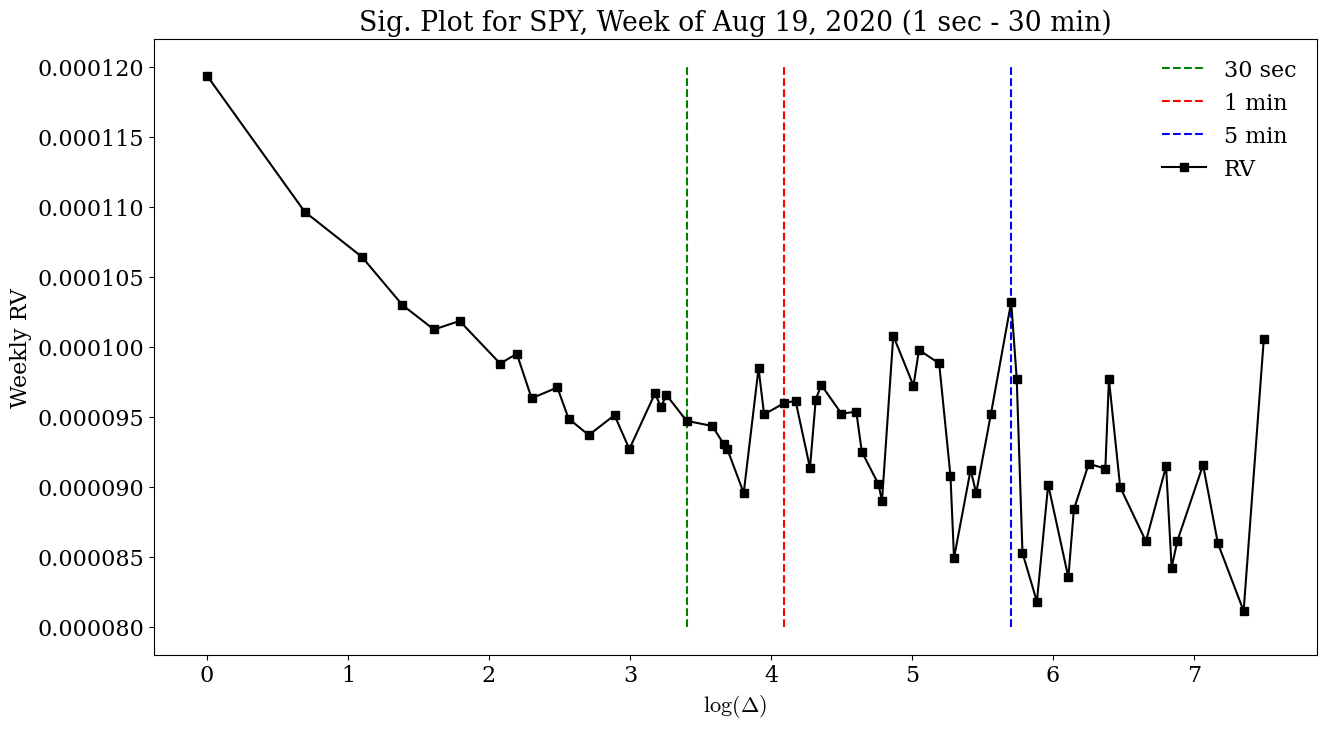

In [44]:
plt.figure(figsize = (15,8))
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'serif'

plt.plot([np.log(30), np.log(30)], (1/(10**4))*np.array([0.8, 1.2]), 'g--')
plt.plot([np.log(60), np.log(60)], (1/(10**4))*np.array([0.8, 1.2]), 'r--')
plt.plot([np.log(300), np.log(300)], (1/(10**4))*np.array([0.8, 1.2]), 'b--')
plt.plot(np.log(d), rv, 'ks-')
plt.legend(['30 sec', '1 min', '5 min', 'RV'], framealpha=0.0)
plt.xlabel('$\log(\Delta)$')
plt.ylabel('Weekly RV')
plt.title('Sig. Plot for SPY, Week of Aug 19, 2020 (1 sec - 30 min)');